<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Árboles de Regresión
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable `Sale_Price`.

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio implementaremos árboles de regresión, por lo que deberá importar la clase `DecisionTreeRegressor`.
* De manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión, división de muestras y búsqueda de grilla con validación cruzada.
* Elimine la columna `'Unnamed: 0'` cuando cargue los datos.

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto de visualización.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (14, 8)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el modelo, el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
# Método para escalar datos
from sklearn.preprocessing import StandardScaler
# Método para la selección de datos entre entrenamiento, test y CV
from sklearn.model_selection import train_test_split, GridSearchCV
# Método para reportar las métricas de modelos de clasificación
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
# Método para generar un modelo de regresión con arboles de decisión
from sklearn.tree import DecisionTreeRegressor

In [5]:
# Se carga la base de datos y se elimina la columna index que no agrega valor.
df = pd.read_csv('ames_housing.csv').drop(columns = 'Unnamed: 0')

In [6]:
# Inspeccionamos los datos
df.sample(5, random_state=14173)

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,Bldg_Type,House_Style,Overall_Qual,Overall_Cond,Year_Built,Year_Remod_Add,Roof_Style,Roof_Matl,Exterior_1st,Exterior_2nd,Mas_Vnr_Type,Mas_Vnr_Area,Exter_Qual,Exter_Cond,Foundation,Bsmt_Qual,Bsmt_Cond,Bsmt_Exposure,BsmtFin_Type_1,BsmtFin_SF_1,BsmtFin_Type_2,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,Heating,Heating_QC,Central_Air,Electrical,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,Kitchen_Qual,TotRms_AbvGrd,Functional,Fireplaces,Fireplace_Qu,Garage_Type,Garage_Finish,Garage_Cars,Garage_Area,Garage_Qual,Garage_Cond,Paved_Drive,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
1034,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,65,9750,Pave,No_Alley_Access,Regular,Lvl,AllPub,FR2,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Above_Average,Very_Good,1969,1969,Gable,CompShg,HdBoard,HdBoard,None,0,Typical,Typical,CBlock,Good,Typical,No,ALQ,1,LwQ,438,14,1054,GasA,Good,Y,SBrkr,1054,0,0,1054,1,0,1,1,3,1,Typical,6,Typ,0,No_Fireplace,Attchd,Unf,2,460,Typical,Typical,Paved,180,0,0,0,80,0,No_Pool,No_Fence,None,0,7,2008,WD,Normal,151000,-93.627875,42.055390
1234,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,7390,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,Gtl,North_Ames,Norm,Norm,OneFam,One_Story,Average,Good,1955,1955,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,151,Typical,Typical,CBlock,Typical,Typical,No,ALQ,1,Unf,0,196,1098,GasA,Typical,Y,SBrkr,1098,0,0,1098,1,0,1,0,3,1,Typical,6,Typ,0,No_Fireplace,Attchd,Unf,1,260,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,7,2008,WD,Normal,135000,-93.617179,42.042373
1808,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,12450,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,Sawyer_West,RRAe,Norm,OneFam,One_Story,Average,Average,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,126,Good,Typical,PConc,Good,Typical,No,GLQ,3,Unf,0,365,1094,GasA,Excellent,Y,SBrkr,1094,0,0,1094,1,0,1,0,3,1,Good,6,Typ,0,No_Fireplace,Detchd,Unf,2,576,Typical,Typical,Paved,0,0,0,0,0,0,No_Pool,No_Fence,None,0,5,2007,WD,Normal,149000,-93.689120,42.037643
2783,Split_or_Multilevel,Residential_Low_Density,42,10385,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,Gtl,College_Creek,Norm,Norm,OneFam,SLvl,Above_Average,Above_Average,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,123,Typical,Typical,CBlock,Typical,Good,Av,ALQ,1,LwQ,400,0,995,GasA,Typical,Y,SBrkr,1282,0,0,1282,0,1,2,0,3,1,Typical,6,Typ,0,No_Fireplace,Detchd,Unf,3,672,Fair,Typical,Paved,386,0,0,0,0,0,No_Pool,No_Fence,None,0,4,2006,WD,Normal,174000,-93.687158,42.020070
841,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,60,8072,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,Gtl,College_Creek,Norm,Norm,OneFam,One_Story,Average,Average,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0,Typical,Good,PConc,Good,Good,No,ALQ,1,Unf,0,244,990,GasA,Excellent,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,Typical,5,Typ,0,No_Fireplace,Detchd,Unf,2,480,Typical,Typical,Paved,0,64,0,0,0,0,No_Pool,No_Fence,None,0,5,2009,WD,Normal,138000,-93.692867,42.019723


___
> Se revisan los datos perdidos para no agregar valores perdidos en la binarización

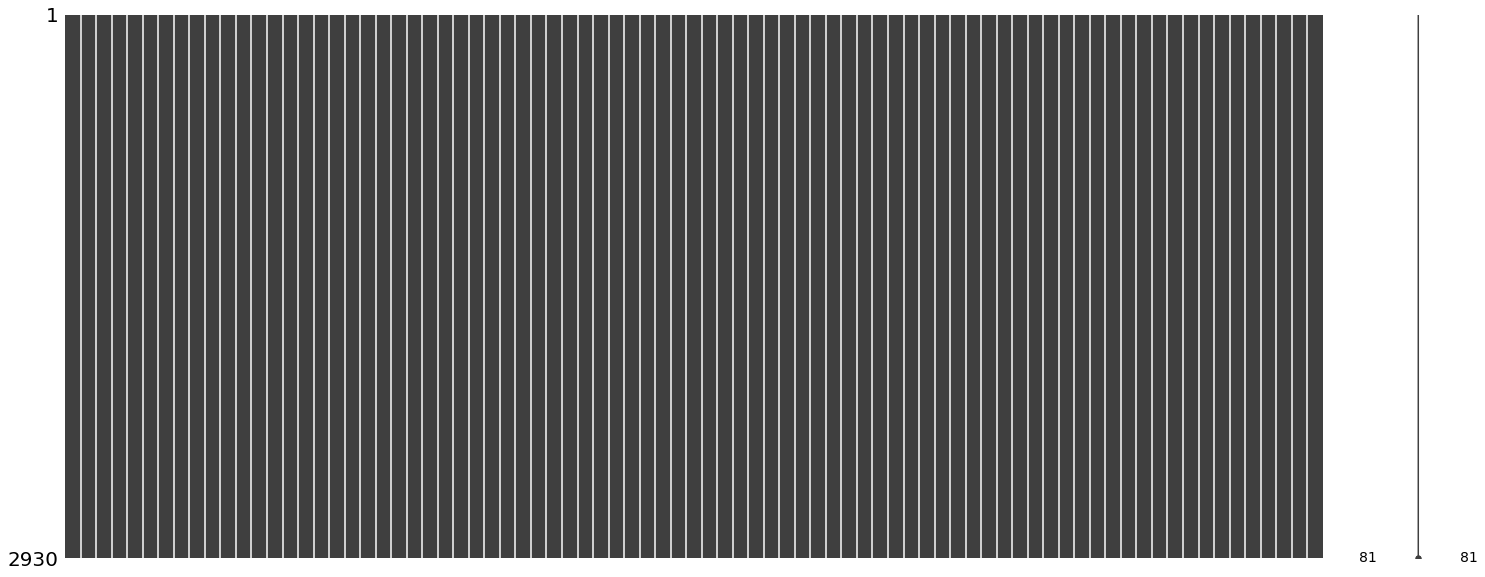

In [7]:
msngo.matrix(df)

> No se observan datos perdidos en la base de datos.

In [8]:
# Revisamos las dimensiones de la base de datos
df.shape

(2930, 81)

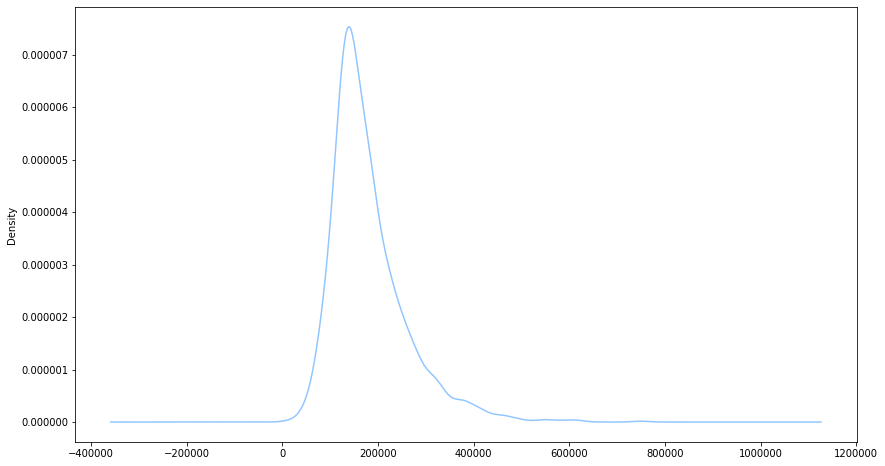

In [9]:
df['Sale_Price'].plot(kind='kde')

> La base de datos se compone de 2930 observaciones con 80 atributos y el vector de clases [Sale_Price]. Se observa que los valores de venta tienen una forma normal con moda en 140.000 aprox.

## Ejercicio 2: Visualizando la distribución de los atributos

* Identifique si el dtype de cada en nuestra base de datos se considera 'object' o no. Para todas las variables que sean , realice lo siguiente:
  1. Genere una recodificación $K-1$ en cada variable. Para efectos prácticos sólo necesitan eliminar una de las categorías, no se concentren en especificar la categoría a eliminar. Pueden utilizar la función pd.get_dummies con la opción drop_first para ello.
  2. Utilizando el método pd.concat , concatene a los atributos creados en la base de datos.
    * tip: No se olvide de eliminar los atributos recodificados, de esta forma evitará un aumento artificial del desempeño del modelo.

> Se utiliza get_dummies para recodificar las variables de tipo `object`.

In [10]:
# Se binarizan las columnas que son tipo objeto
df_bin = pd.get_dummies(df, 
               [x for x in df.columns if df[x].dtype =='object'], 
               dummy_na=False,
               drop_first=True
              )

In [11]:
# Revisamos la muestra
df_bin.sample(5, random_state=14173)

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Cars,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,Three_season_porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Year_Sold,Sale_Price,Longitude,Latitude,MS_SubClass_One_Story_1945_and_Older,MS_SubClass_One_Story_1946_and_Newer_All_Styles,MS_SubClass_One_Story_PUD_1946_and_Newer,MS_SubClass_One_Story_with_Finished_Attic_All_Ages,MS_SubClass_One_and_Half_Story_Finished_All_Ages,MS_SubClass_One_and_Half_Story_PUD_All_Ages,MS_SubClass_One_and_Half_Story_Unfinished_All_Ages,MS_SubClass_PUD_Multilevel_Split_Level_Foyer,MS_SubClass_Split_Foyer,MS_SubClass_Split_or_Multilevel,MS_SubClass_Two_Family_conversion_All_Styles_and_Ages,MS_SubClass_Two_Story_1945_and_Older,MS_SubClass_Two_Story_1946_and_Newer,MS_SubClass_Two_Story_PUD_1946_and_Newer,MS_SubClass_Two_and_Half_Story_All_Ages,MS_Zoning_C_all,MS_Zoning_Floating_Village_Residential,MS_Zoning_I_all,MS_Zoning_Residential_High_Density,MS_Zoning_Residential_Low_Density,MS_Zoning_Residential_Medium_Density,Street_Pave,Alley_No_Alley_Access,Alley_Paved,Lot_Shape_Moderately_Irregular,Lot_Shape_Regular,Lot_Shape_Slightly_Irregular,Land_Contour_HLS,Land_Contour_Low,Land_Contour_Lvl,Utilities_NoSeWa,Utilities_NoSewr,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Land_Slope_Mod,Land_Slope_Sev,Neighborhood_Blueste,Neighborhood_Briardale,Neighborhood_Brookside,Neighborhood_Clear_Creek,Neighborhood_College_Creek,Neighborhood_Crawford,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Green_Hills,Neighborhood_Greens,Neighborhood_Iowa_DOT_and_Rail_Road,Neighborhood_Landmark,Neighborhood_Meadow_Village,Neighborhood_Mitchell,Neighborhood_North_Ames,Neighborhood_Northpark_Villa,Neighborhood_Northridge,Neighborhood_Northridge_Heights,Neighborhood_Northwest_Ames,Neighborhood_Old_Town,Neighborhood_Sawyer,Neighborhood_Sawyer_West,Neighborhood_Somerset,Neighborhood_South_and_West_of_Iowa_State_University,Neighborhood_Stone_Brook,Neighborhood_Timberland,Neighborhood_Veenker,Condition_1_Feedr,Condition_1_Norm,Condition_1_PosA,Condition_1_PosN,Condition_1_RRAe,Condition_1_RRAn,Condition_1_RRNe,Condition_1_RRNn,Condition_2_Feedr,Condition_2_Norm,Condition_2_PosA,Condition_2_PosN,Condition_2_RRAe,Condition_2_RRAn,Condition_2_RRNn,Bldg_Type_OneFam,Bldg_Type_Twnhs,Bldg_Type_TwnhsE,Bldg_Type_TwoFmCon,House_Style_One_and_Half_Fin,House_Style_One_and_Half_Unf,House_Style_SFoyer,House_Style_SLvl,House_Style_Two_Story,House_Style_Two_and_Half_Fin,House_Style_Two_and_Half_Unf,Overall_Qual_Average,Overall_Qual_Below_Average,Overall_Qual_Excellent,Overall_Qual_Fair,Overall_Qual_Good,Overall_Qual_Poor,Overall_Qual_Very_Excellent,Overall_Qual_Very_Good,Overall_Qual_Very_Poor,Overall_Cond_Average,Overall_Cond_Below_Average,Overall_Cond_Excellent,Overall_Cond_Fair,Overall_Cond_Good,Overall_Cond_Poor,Overall_Cond_Very_Good,Overall_Cond_Very_Poor,Roof_Style_Gable,Roof_Style_Gambrel,Roof_Style_Hip,Roof_Style_Mansard,Roof_Style_Shed,Roof_Matl_CompShg,Roof_Matl_Membran,Roof_Matl_Metal,Roof_Matl_Roll,Roof_Matl_Tar&Grv,Roof_Matl_WdShake,Roof_Matl_WdShngl,Exterior_1st_AsphShn,Exterior_1st_BrkComm,Exterior_1st_BrkFace,Exterior_1st_CBlock,Exterior_1st_CemntBd,Exterior_1st_HdBoard,Exterior_1st_ImStucc,Exterior_1st_MetalSd,Exterior_1st_Plywood,Exterior_1st_PreCast,Exterior_1st_Stone,Exterior_1st_Stucco,Exterior_1st_VinylSd,Exterior_1st_Wd Sdng,Exterior_1st_WdShing,Exterior_2nd_AsphShn,Exterior_2nd_Brk Cmn,Exterior_2nd_BrkFace,Exterior_2nd_CBlock,Exterior_2nd_CmentBd,Exterior_2nd_HdBoard,Exterior_2nd_ImStucc,Exterior_2nd_MetalSd,Exterior_2nd_Other,Exterior_2nd_Plywood,Exterior_2nd_PreCast,Exterior_2nd_Stone,Exterior_2nd_Stucco,Exterior_2nd_VinylSd,Exterior_2nd_Wd Sdng,Exterior_2nd_Wd Shng,Mas_Vnr_Type_BrkFace,Mas_Vnr_Type_CBlock,Mas_V

## Ejercicio 3: Primer modelo
* Genere muestras de entrenamiento y validación con `'Sale_Price'` como vector objetivo y los atributos de la base de datos como matriz.
* Recuerde definir el porcentaje de casos en la muestra de validación y una semilla pseudoaleatoria.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_bin.drop(columns='Sale_Price'), 
                                                    df['Sale_Price'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

* Posteriormente, entrene un árbol de regresión en la muestra de entrenamiento sin modificar los hiperparámetros. Reporte las principales métricas de desempeño.
* Comente sobre el desempeño.

In [13]:
model_tree = DecisionTreeRegressor().fit(X_train, y_train)

In [14]:
yhat = model_tree.predict(X_test)

In [15]:
afx.report_scores_regressor(y_test, yhat)

Error Cuadrático Medio:
1293546414.6267

Error Medio Absoluto:
16700.0

R cuadrado:
0.8


> De acuerdo al ECM podemos observar que el modelo está sobre estimando en USD 1615MM.

## Ejercicio 4: Importancia relativa
* Implemente el método plot_importance utilizado en la lectura para reportar la importancia relativa de los atributos.
* Comente sobre cuáles son los principales 10 atributos que afectan la predicción de `Sale_Price`.
* Separe éstos 10 atributos en una nueva base de datos, junto con el vector objetivo.


> Generamos el pre-procesamiento de los datos para adaptarlos de mejor manera al tipo de modelo a tratar:

In [23]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::]
    names = [feat_names[i] for i in sort_importance if i<=10]
    plt.title("Feature importance")
    plt.barh(range(len(feat_names)), tmp_importance[sort_importance])
    plt.yticks(range(len(feat_names)), names, rotation=0)

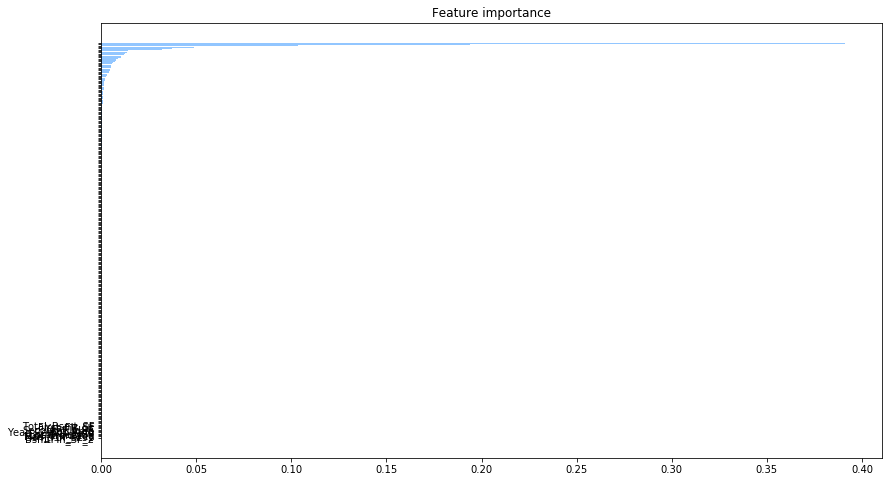

In [24]:
plot_importance(model_tree, df_bin.drop(columns='Sale_Price').columns)

> Generamos una búsqueda del mejor modelo con la combinación de los parámetros C y Gamma, con 10 validaciones cruzadas.

In [ ]:
c_param_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_param_range = [0.0000001, 0.0001, 0.001, 0.01, 0.1, 1, 10]
params = {'C': c_param_range, 'gamma': gamma_param_range}

In [ ]:
estimatecv = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 10)
estimatecv.fit(X_train, y_train)

> Revisamos el mejor estimador, más bien el mejor modelo.

In [ ]:
estimatecv.best_estimator_

In [ ]:
# Redimensionamos los resultados de mean_test_score que se encuentran como una lista, y estructuramos
# como un arreglo de 8 filas y 7 columnas
cv_params = np.array(estimatecv.cv_results_['mean_test_score']).reshape(8, 7)
plt.figure(figsize=(12, 8))
sns.heatmap(cv_params, 
            annot = True, 
            cmap = 'YlGnBu', 
            cbar = False, 
            xticklabels=gamma_param_range, 
            yticklabels=c_param_range, 
            fmt='.3')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')

> Se observa que para el caso del Hiperparámetro __C (costo)__ los valores más altos del puntaje del modelo se obtienen entre 0.1 y 1000. Para el caso de __gamma__ los valores más altos se obtienen entre 0.0001 y 0.1. Puntajes más altos denotan modelos más eficientes.

In [ ]:
estimatecv.best_params_

In [ ]:
estimatecv.best_score_

> El mejor puntaje es de __0.98__ obtenido con la combinaciónde de los Hiperparámetros __C = 10__ y __gamma = 0.01__.

In [ ]:
result_split = pd.DataFrame({ key:value for (key,value) in estimatecv.cv_results_.items() if key.find('split')>=0 })
result_split_columns = [str(x) for x in estimatecv.cv_results_['params']]
plt.figure(figsize=(16, 8))
plt.boxplot(result_split, showmeans=True, );
plt.xticks(range(1, len(result_split_columns) + 1), result_split_columns, rotation = 90)
plt.title(f"Best Params: {estimatecv.best_params_}")

> Con este __BoxPlot__ podemos observar como se comportaron los puntajes en las 10 validaciones cruzadas. Para el caso de la mejor conmbinación de hiperparámetros (C = 10 y gamma = 0.01) se observan puntajes asimétricos, cargados al límite superior el cual toca el __1__.

In [ ]:
yhat = estimatecv.best_estimator_.predict(X_train)
print(classification_report(y_train, yhat))

> El desempeño general del modelo (weighted avg) es bastante alto, pero se debe a que estamos evaluando el modelo con los mismos datos usados para buscar y entrenar. Valores de f1-score en torno a 0.99 hacen sospechar un sobre ajuste del modelo. Ahora debemos revisar la capacidad de predecir con datos distintos a los usados en el proceso de entrenamiento.

## Ejercicio 5: Validación del modelo en el hold-out sample

* Genere las predicciones del hold-out sample en base a la mejor combinación de hiperparámetros. Genere un reporte con las métricas de desempeño clásicas para los modelos de clasificación. Comente en qué casos el modelo presenta un desempeño deficiente

> Usando el mejor estimados (__estimatecv.best_estimator___) vamos a obtener nuestro vector estimado con los datos seleccionados como __hold-out sample__.

In [ ]:
yhat = estimatecv.best_estimator_.predict(X_test)

In [ ]:
print(classification_report(y_test, yhat))

> Podemos observar que el desempeño general del modelo no vario mucho respecto a la validación que hicimos con los datos de entrenamiento. Dado que el desempeño del modelo es bastante bueno con datos distintos a los usados para entrenar, descartamos el sobre ajuste y estamos capacitados para decir que estamos frente a un muy buen modelo.

## Ejercicio (opcional): Depuración de atributos

* Reentrene el modelo en función de los atributos que presenten un coeficiente de overlap menor a .45.
* Reporte el desempeño del modelo y comente sobre los nuevos hiperparámetros estimados, así como su desempeño en comparación al modelo del ejercicio 5.

In [ ]:
# Selecciono los nombres de atributos menos superpuestos
X_less_overlapping = [x for x in Overlap[Overlap['Overlap'] < .45]['Atributo']]
# Re-escalo los atributos
X_scaled_2 = StandardScaler().fit_transform(df.loc[:, X_less_overlapping])

In [ ]:
# Selecciono mis set de datos para trabajar
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled_2, 
                                                    df['diagnosis_bin'], 
                                                    test_size = .33, 
                                                    random_state = 14173)

In [ ]:
estimatecv_less_overlapping = GridSearchCV(SVC(kernel = 'rbf'), params, cv = 10)
estimatecv_less_overlapping.fit(X_train_2, y_train_2)

> Revisamos el mejor estimador, más bien el mejor modelo.

In [ ]:
estimatecv_less_overlapping.best_estimator_

In [ ]:
cv_params_2 = np.array(estimatecv_less_overlapping.cv_results_['mean_test_score']).reshape(8, 7)
plt.figure(figsize=(12, 8))
sns.heatmap(cv_params_2, 
            annot = True, 
            cmap = 'YlGnBu', 
            cbar = False, 
            xticklabels=gamma_param_range, 
            yticklabels=c_param_range, 
            fmt='.3')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')

> Se observa que para el caso del Hiperparámetro __C (costo)__ los valores más altos del puntaje del modelo se obtienen entre 0.1 y 1000. Para el caso de __gamma__ los valores más altos se obtienen entre 0.0001 y 1. Puntajes más altos denotan modelos más eficientes.
>
> Al eliminar los atributos más acoplados en relación a nuestras clases, se observa que se incremenra el rango donde el parámetro Gamma genera un modelo con desempeño eficiente. 

In [ ]:
estimatecv_less_overlapping.best_params_

In [ ]:
estimatecv_less_overlapping.best_score_

> El mejor puntaje es de __0.98__ (al igual que el modelo con menos más atributos) obtenido con la combinaciónde de los Hiperparámetros __C = 100__ y __gamma = 0.001__.

In [ ]:
result_split = pd.DataFrame({ key:value for (key,value) in estimatecv_less_overlapping.cv_results_.items() if key.find('split')>=0 })
result_split_columns = [str(x) for x in estimatecv_less_overlapping.cv_results_['params']]
plt.figure(figsize=(16, 8))
plt.boxplot(result_split, showmeans=True, );
plt.xticks(range(1, len(result_split_columns) + 1), result_split_columns, rotation = 90)
plt.title(f"Best Params: {estimatecv_less_overlapping.best_params_}")

> Con este __BoxPlot__ podemos observar como se comportaron los puntajes en las 10 validaciones cruzadas. Para el caso de la mejor conmbinación de hiperparámetros (C = 100 y gamma = 0.001) se observan puntajes asimétricos, cargados al límite superior el cual toca el __1__.

In [ ]:
yhat_2 = estimatecv_less_overlapping.best_estimator_.predict(X_test_2)

In [ ]:
print(classification_report(y_test_2, yhat_2))

> Podemos observar que el __desempeño general del modelo bajó__ muy poco respecto al modelo con todos los atributos (incluidos los más acoplados). Dado que el desempeño del modelo es bastante bueno con datos distintos a los usados para entrenar, descartamos el sobre ajuste y estamos capacitados para decir que estamos frente a un muy buen modelo.